<a href="https://colab.research.google.com/github/mflilian/PokemonUFABC/blob/main/ProjetoPokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Projeto Pokemón** - Análise de Correlação
 
Ponto Principal: Analisar alguns atributos dos Pokémons fazendo uso de gráficos, dados estatísticos ou análise de correlações e, em seguida, criar um relatório de análise com base no que foi observado. 
 
**Atenção**
 
Para melhor organização da tabela, resolvemos reduzir o número de pokemons que foram mostrados: de 721 pokemons, foram selecionados 20. Como critério de escolha, colocamos a soma das características totais dos pokemons em ordem crescente e pegamos os 20 últimos pokemons da nova tabela. Adicionado a isso, excluímos também a coluna "#", a qual definiria o ID de cada Pokemon, utilizando apenas o identificador de quantidade de linhas da tabela.

In [ ]:
from google.colab import drive
 
drive.mount('/content/drive')
 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
 
pd.read_csv("/content/drive/My Drive/POKEmonio.csv")
df = pd.read_csv("/content/drive/My Drive/POKEmonio.csv")
 
df.tail(20)
df = df.tail(20)
df
 
df = df.drop(columns='#')
df

Mounted at /content/drive


,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
780,PumpkabooAverage Size,Ghost,Grass,335,49,66,70,44,55,51,6,False
781,PumpkabooSmall Size,Ghost,Grass,335,44,66,70,44,55,56,6,False
782,PumpkabooLarge Size,Ghost,Grass,335,54,66,70,44,55,46,6,False
783,PumpkabooSuper Size,Ghost,Grass,335,59,66,70,44,55,41,6,False
784,GourgeistAverage Size,Ghost,Grass,494,65,90,122,58,75,84,6,False
785,GourgeistSmall Size,Ghost,Grass,494,55,85,122,58,75,99,6,False
786,GourgeistLarge Size,Ghost,Grass,494,75,95,122,58,75,69,6,False
787,GourgeistSuper Size,Ghost,Grass,494,85,100,122,58,75,54,6,False
788,Bergmite,Ice,NaN,304,55,69,85,32,35,28,6,False
789,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False


In [ ]:
df.sort_values(by='Total', ascending=True) 
df = df.sort_values(by='Total', ascending=True) 
df

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
790,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False
788,Bergmite,Ice,NaN,304,55,69,85,32,35,28,6,False
780,PumpkabooAverage Size,Ghost,Grass,335,49,66,70,44,55,51,6,False
781,PumpkabooSmall Size,Ghost,Grass,335,44,66,70,44,55,56,6,False
782,PumpkabooLarge Size,Ghost,Grass,335,54,66,70,44,55,46,6,False
783,PumpkabooSuper Size,Ghost,Grass,335,59,66,70,44,55,41,6,False
784,GourgeistAverage Size,Ghost,Grass,494,65,90,122,58,75,84,6,False
785,GourgeistSmall Size,Ghost,Grass,494,55,85,122,58,75,99,6,False
786,GourgeistLarge Size,Ghost,Grass,494,75,95,122,58,75,69,6,False
787,GourgeistSuper Size,Ghost,Grass,494,85,100,122,58,75,54,6,False


Agora, a partir dessa nova tabela faremos uma análise baseada nos pokemons lendários e não lendários. 

O primeiro passo será identificá-los, como feito nos dois códigos abaixo:

In [ ]:
w = df[(df['Legendary'] == False)]
w

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
790,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False
788,Bergmite,Ice,NaN,304,55,69,85,32,35,28,6,False
780,PumpkabooAverage Size,Ghost,Grass,335,49,66,70,44,55,51,6,False
781,PumpkabooSmall Size,Ghost,Grass,335,44,66,70,44,55,56,6,False
782,PumpkabooLarge Size,Ghost,Grass,335,54,66,70,44,55,46,6,False
783,PumpkabooSuper Size,Ghost,Grass,335,59,66,70,44,55,41,6,False
784,GourgeistAverage Size,Ghost,Grass,494,65,90,122,58,75,84,6,False
785,GourgeistSmall Size,Ghost,Grass,494,55,85,122,58,75,99,6,False
786,GourgeistLarge Size,Ghost,Grass,494,75,95,122,58,75,69,6,False
787,GourgeistSuper Size,Ghost,Grass,494,85,100,122,58,75,54,6,False


In [ ]:
x = df[(df['Legendary'] == True)]
x

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
794,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
799,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True
792,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True
793,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True


Dessa forma, percebe-se que há 8 pokémons lendários e 12 não lendários na nova tabela. 

Afinal, o que faz um pokémon ser, ou não, lendário? 
Nas tabelas acima, nota-se que os IDs com o maior resultado das somas das colunas attack, defense, Sp. Atk, Sp. Def, são pertencentes a pokémons lendários. 

Assim, pode inferir-se que, quanto maior a soma das características totais, maior a chance do pokémon ser lendário.  

Para melhor visualização, criamos um gráfico de barras correlativo entre os 20 pokémons citados (que estão no eixo x) e a soma total das características de cada um (que estão no eixo y). Observe: 

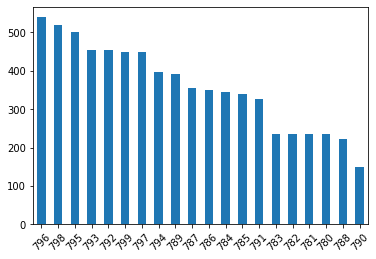

In [ ]:
df[['Attack','Defense', 'Sp. Atk', 'Sp. Def']].sum(axis=1).sort_values(ascending=False).head(20).plot(kind='bar',rot=45)


Mais uma vez conseguimos observar que quanto maior a soma das características totais, maior a chance do pokémon ser lendário. 




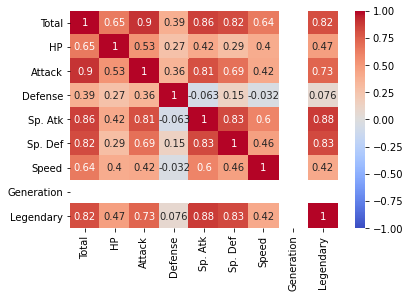

In [ ]:
sns.heatmap(df.corr(),  vmin=-1, vmax=1, center=0, annot = True, cmap= 'coolwarm')

Partindo disso, podemos aprofundar mais a análise. 
Já sabemos um possível motivo sobre o que faz um pokémon ser, ou não, lendário. 
Vamos analisar os tipos dos pokémons (tipo 1 e tipo 2), e observar a quantidade de pokémons lendários existentes em cada um. 

Para isso, usaremos um gráfico correlativo que ilustrará a situação.

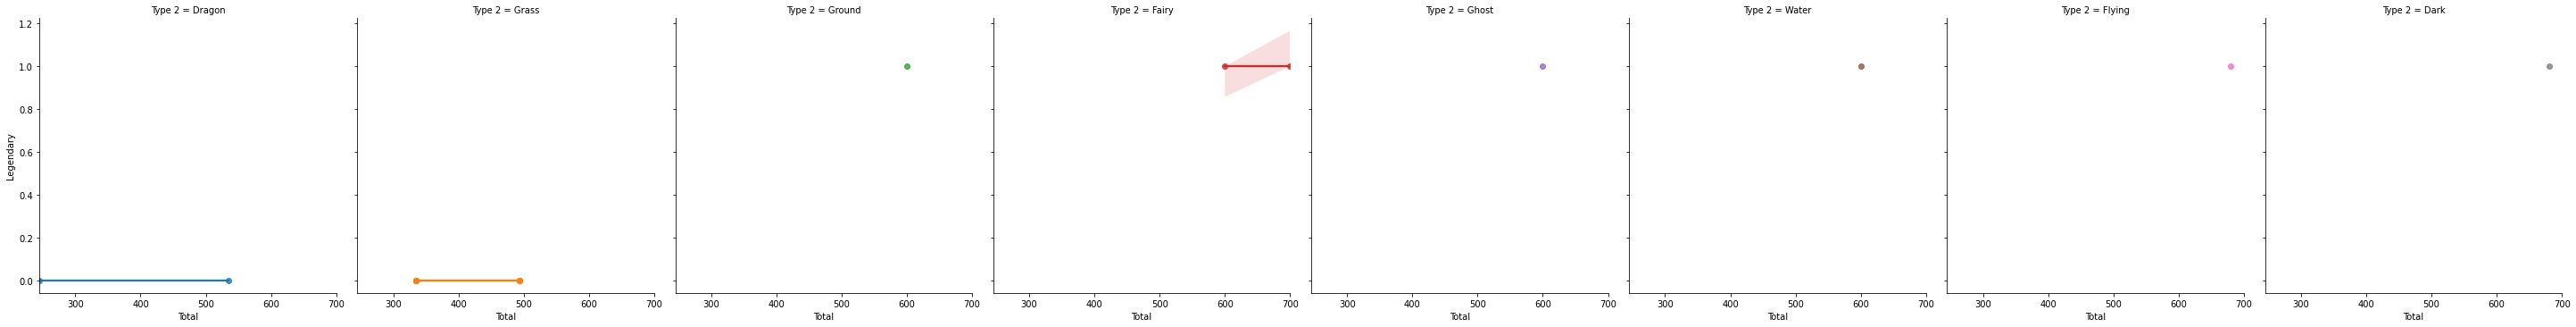

In [ ]:
sns.lmplot(x='Total', y='Legendary', data=df, hue='Type 2' , col='Type 2')

Para os pokémons do tipo 2, percebe-se que apenas 6 tipos são lendários:  ground, fairy, ghost, water, flying e dark, enquanto que dragon, ice e grass não são. 

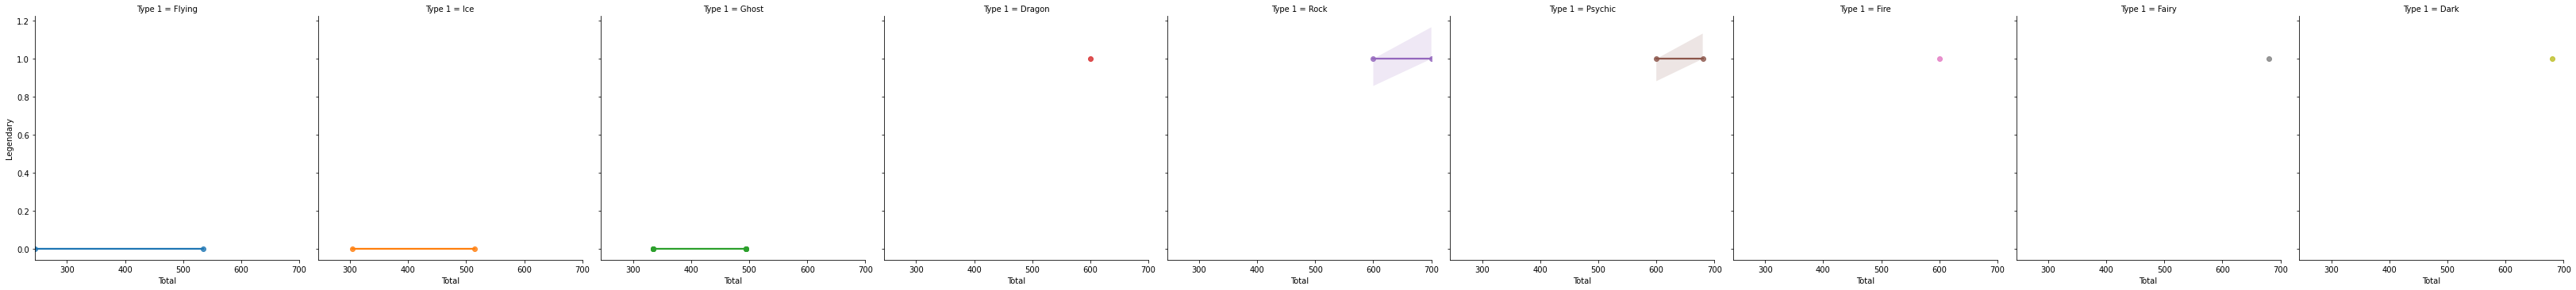

In [ ]:
sns.lmplot(x='Total', y='Legendary', data=df, hue='Type 1' , col='Type 1')

Para os pokémons do tipo 1, percebe-se que 8 de 9 tipos são lendários, são eles: dragon, rock, psychic, fire, fairy e dark, flying e ghost, enquanto que apenas ice não é.




Partindo dessa análise, pode-se inferir que, o tipo 'Ice' não é lendário nenhuma vez enquanto tipo 1 e tipo 2. 
Uma possível explicação seria a soma de suas características totais, que aparece na tabela como sendo uma das mais baixas do tipo 1, pertecente ao pokémon nº 788: Bergmite. 

Entretanto, o ice tipo 2 (pokémon nº 789: Avalugg) possui uma das maiores somas da tabela e, ainda assim,  não é considerdo um pokémon lendário. 

Uma possível explicação para isso, seria a diferença da velocidade desse pokémon em relação aos demais, visto que todo o restante possui uma velocidade maior que 40, enquanto que o tipo ice estagna em 28.